In [1]:
#initial look at the dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dataset = pd.read_csv('online_retail.csv')
print(dataset.head())
print(dataset.describe())
print(dataset.info())
print(dataset.isnull().sum())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.7

In [2]:
#Data cleaning
dataset = dataset.dropna()
dataset = dataset[dataset['Quantity'] > 0]
dataset = dataset[dataset['UnitPrice'] > 0]
dataset = dataset.drop(columns=['Description'])
dataset.describe()
print(dataset['CustomerID'].nunique())


4338


In [3]:
#Outlier detection
outlierColumns = ["Quantity" , "UnitPrice"]
for col in outlierColumns:
    Q3 = dataset[col].quantile(0.75)
    Q1 = dataset[col].quantile(0.25)
    IQR = Q3-Q1
    upperBound = Q3 + 1.5*IQR
    lowerBound = Q1-1.5*IQR
    above_upper = (dataset[col] > upperBound).sum()
    below_lower = (dataset[col] < lowerBound).sum()
    print(f"{col}:")
    print("  Above upper bound:", above_upper)
    print("  Below lower bound:", below_lower)
    
    



Quantity:
  Above upper bound: 25647
  Below lower bound: 0
UnitPrice:
  Above upper bound: 34356
  Below lower bound: 0


In [4]:
#Outlier rows
Q1 = dataset['Quantity'].quantile(0.25)
Q3 = dataset['Quantity'].quantile(0.75)
IQR = Q3 - Q1

lower_bound_q = Q1 - 1.5 * IQR
upper_bound_q = Q3 + 1.5 * IQR

quantity_outliers = dataset[
    (dataset['Quantity'] > upper_bound_q) |
    (dataset['Quantity'] < lower_bound_q)
]
#These represent bulk purchases, customers who buy in bulk purchases are valuable to us.
quantity_outliers


,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9,536367,84879,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom
31,536370,10002,48,2010-12-01 08:45:00,0.85,12583.0,France
44,536370,22492,36,2010-12-01 08:45:00,0.65,12583.0,France
46,536371,22086,80,2010-12-01 09:00:00,2.55,13748.0,United Kingdom
65,536374,21258,32,2010-12-01 09:09:00,10.95,15100.0,United Kingdom
...,...,...,...,...,...,...,...
541835,581579,23581,40,2011-12-09 12:19:00,1.79,17581.0,United Kingdom
541865,581583,20725,40,2011-12-09 12:23:00,1.45,13777.0,United Kingdom
541866,581583,85038,36,2011-12-09 12:23:00,1.85,13777.0,United Kingdom
541867,581584,20832,72,2011-12-09 12:25:00,0.72,13777.0,United Kingdom


In [5]:
#Outlier rows
Q1 = dataset['UnitPrice'].quantile(0.25)
Q3 = dataset['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1

lower_bound_u = Q1 - 1.5 * IQR
upper_bound_u = Q3 + 1.5 * IQR

unitPrice_outliers = dataset[
    (dataset['UnitPrice'] > upper_bound_u) |
    (dataset['UnitPrice'] < lower_bound_u)
]
#These represent customers that buy products that are very expensive, which are also valuable customers to us
unitPrice_outliers

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
5,536365,22752,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
16,536367,22622,2,2010-12-01 08:34:00,9.95,13047.0,United Kingdom
19,536367,21777,4,2010-12-01 08:34:00,7.95,13047.0,United Kingdom
20,536367,48187,4,2010-12-01 08:34:00,7.95,13047.0,United Kingdom
45,536370,POST,3,2010-12-01 08:45:00,18.00,12583.0,France
...,...,...,...,...,...,...,...
541768,581578,POST,3,2011-12-09 12:16:00,18.00,12713.0,Germany
541786,581578,22622,6,2011-12-09 12:16:00,11.95,12713.0,Germany
541831,581579,22941,4,2011-12-09 12:19:00,8.50,17581.0,United Kingdom
541849,581580,22894,2,2011-12-09 12:20:00,9.95,12748.0,United Kingdom


In [6]:
#Capping the outliers
dataset["UnitPrice_c"] = dataset["UnitPrice"].clip(
    lower=0,
    upper=upper_bound_u
)
dataset["Quantity_c"] = dataset["Quantity"].clip(
    lower=0,
    upper=upper_bound_q
)
dataset

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,UnitPrice_c,Quantity_c
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2.55,6
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,3.39,6
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2.75,8
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,3.39,6
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,3.39,6
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,12,2011-12-09 12:50:00,0.85,12680.0,France,0.85,12
541905,581587,22899,6,2011-12-09 12:50:00,2.10,12680.0,France,2.10,6
541906,581587,23254,4,2011-12-09 12:50:00,4.15,12680.0,France,4.15,4
541907,581587,23255,4,2011-12-09 12:50:00,4.15,12680.0,France,4.15,4


In [7]:
#Calculating RFM
dataset["transactionCost"] = dataset["Quantity_c"] * dataset['UnitPrice_c']
dataset["formatedDate"] = pd.to_datetime(dataset["InvoiceDate"])
sortedDataset = dataset.sort_values(by="formatedDate" , ascending=False)
referenceDate = sortedDataset["formatedDate"].iloc[0] + pd.Timedelta(days=1)
rfm = sortedDataset.groupby("CustomerID").agg({
    "formatedDate" : "first",
    "transactionCost" : "sum",
    "InvoiceNo" : 'nunique'
})
rfm = rfm.reset_index()
rfm['R'] = (referenceDate - rfm["formatedDate"]).dt.days
rfm = rfm.drop(columns=['formatedDate'])
rfm = rfm.rename(
    columns={
    "transactionCost" : "M",
    "InvoiceNo" : "F"
    }
)
rfm


,CustomerID,M,F,R
0,12346.0,28.08,1,326
1,12347.0,3877.44,7,2
2,12348.0,557.57,4,75
3,12349.0,1336.65,1,19
4,12350.0,301.90,1,310
...,...,...,...,...
4333,18280.0,174.50,1,278
4334,18281.0,61.92,1,181
4335,18282.0,150.96,2,8
4336,18283.0,2081.98,16,4


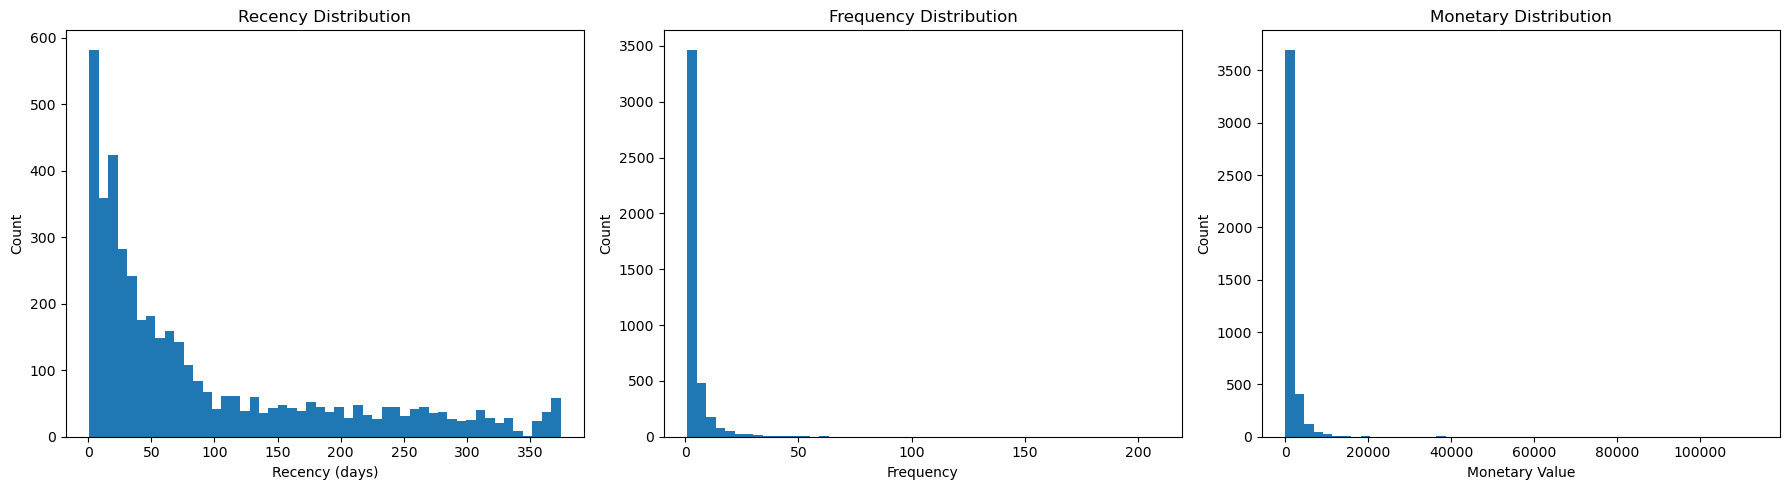

In [8]:

plt.figure(figsize=(18, 5))

# Recency distribution
plt.subplot(1, 3, 1)
plt.hist(rfm["R"], bins=50)
plt.xlabel("Recency (days)")
plt.ylabel("Count")
plt.title("Recency Distribution")

# Frequency distribution
plt.subplot(1, 3, 2)
plt.hist(rfm["F"], bins=50)
plt.xlabel("Frequency")
plt.ylabel("Count")
plt.title("Frequency Distribution")

# Monetary distribution
plt.subplot(1, 3, 3)
plt.hist(rfm["M"], bins=50)
plt.xlabel("Monetary Value")
plt.ylabel("Count")
plt.title("Monetary Distribution")

plt.tight_layout()
plt.show()


In [9]:

rfm["F_log"] = np.log1p(rfm["F"])
rfm["M_log"] = np.log1p(rfm["M"])


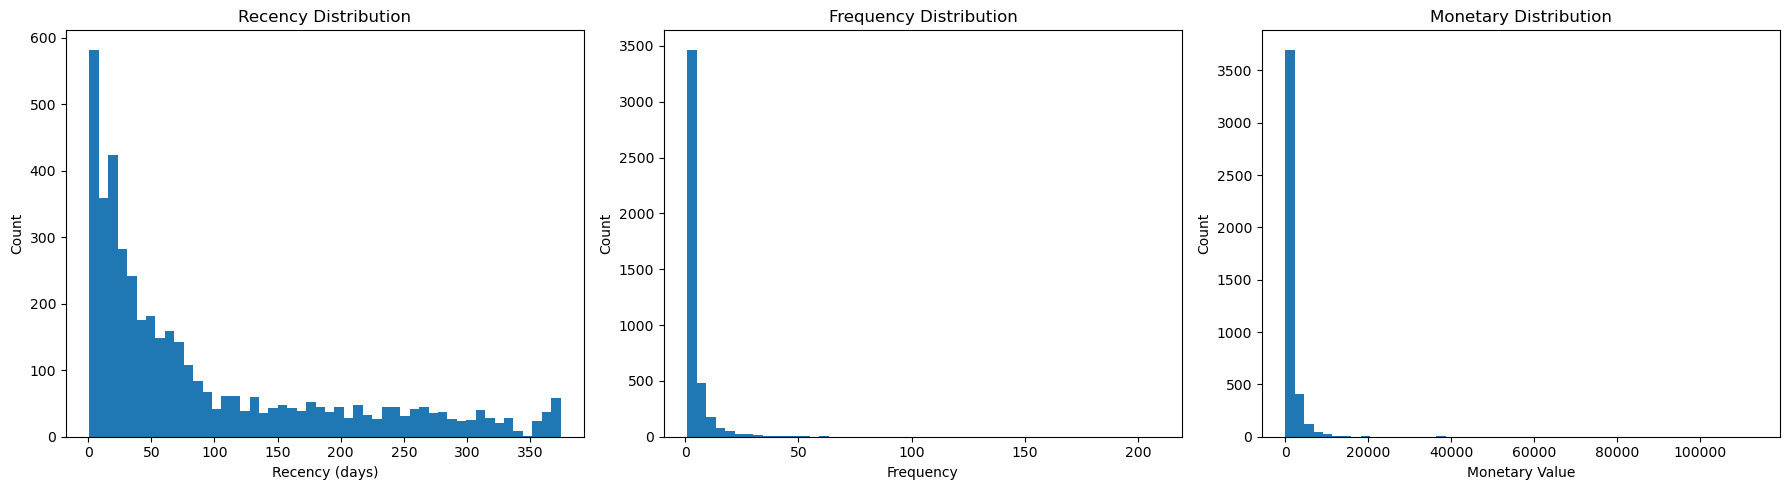

In [10]:

plt.figure(figsize=(18, 5))

# Recency distribution
plt.subplot(1, 3, 1)
plt.hist(rfm["R"], bins=50)
plt.xlabel("Recency (days)")
plt.ylabel("Count")
plt.title("Recency Distribution")

# Frequency distribution
plt.subplot(1, 3, 2)
plt.hist(rfm["F"], bins=50)
plt.xlabel("Frequency")
plt.ylabel("Count")
plt.title("Frequency Distribution")

# Monetary distribution
plt.subplot(1, 3, 3)
plt.hist(rfm["M"], bins=50)
plt.xlabel("Monetary Value")
plt.ylabel("Count")
plt.title("Monetary Distribution")

plt.tight_layout()
plt.show()


In [11]:
rfm

,CustomerID,M,F,R,F_log,M_log
0,12346.0,28.08,1,326,0.693147,3.370051
1,12347.0,3877.44,7,2,2.079442,8.263188
2,12348.0,557.57,4,75,1.609438,6.325380
3,12349.0,1336.65,1,19,0.693147,7.198670
4,12350.0,301.90,1,310,0.693147,5.713403
...,...,...,...,...,...,...
4333,18280.0,174.50,1,278,0.693147,5.167639
4334,18281.0,61.92,1,181,0.693147,4.141864
4335,18282.0,150.96,2,8,1.098612,5.023617
4336,18283.0,2081.98,16,4,2.833213,7.641555


In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

rfm_scaled = scaler.fit_transform(
    rfm[["R", "F_log", "M_log"]]
)

rfm_scaled = pd.DataFrame(
    rfm_scaled,
    index=rfm.index,
    columns=["R", "F_log", "M_log"]
)


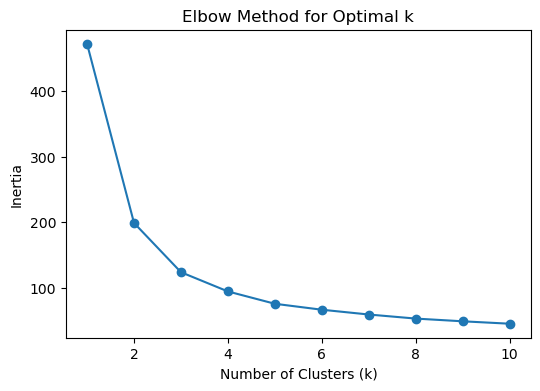

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

WCSS = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    WCSS.append(kmeans.inertia_) #inertia is sum of sum of squared distances in the clusters

plt.figure(figsize=(6, 4))
plt.plot(k_range, WCSS, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()


In [14]:
from sklearn.metrics import silhouette_score
silhouette_scores = {}
k_range = range(3, 6) 

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(rfm_scaled)
    score = silhouette_score(rfm_scaled, labels)
    silhouette_scores[k] = score

silhouette_scores

best_k = max(silhouette_scores, key=silhouette_scores.get)
best_k


3

In [15]:
#Running K-means
kmeans = KMeans(n_clusters=best_k , random_state=42 , n_init=10)
kmeans.fit(rfm_scaled)
rfm["Cluster"] = kmeans.labels_
rfm

,CustomerID,M,F,R,F_log,M_log,Cluster
0,12346.0,28.08,1,326,0.693147,3.370051,1
1,12347.0,3877.44,7,2,2.079442,8.263188,2
2,12348.0,557.57,4,75,1.609438,6.325380,0
3,12349.0,1336.65,1,19,0.693147,7.198670,0
4,12350.0,301.90,1,310,0.693147,5.713403,1
...,...,...,...,...,...,...,...
4333,18280.0,174.50,1,278,0.693147,5.167639,1
4334,18281.0,61.92,1,181,0.693147,4.141864,1
4335,18282.0,150.96,2,8,1.098612,5.023617,0
4336,18283.0,2081.98,16,4,2.833213,7.641555,2


In [16]:

cluster_info = rfm.groupby("Cluster").agg({
    "CustomerID" : 'size',
    'R' : 'mean',
    "F" : "mean",
    "M" : "mean"
})
cluster_info = cluster_info.reset_index()

cluster_info

,Cluster,CustomerID,R,F,M
0,0,2058,56.563654,2.044218,552.388286
1,1,1005,254.545274,1.541294,371.871822
2,2,1275,22.899608,10.020392,3504.282651
